# EDA & PROCESSING

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#set path for rawdata
raw_data_path   = os.path.join(os.path.pardir,"data","raw")
train_file_path = os.path.join(raw_data_path,'train.csv')
test_file_path  = os.path.join(raw_data_path,'test.csv')

In [3]:
train_df = pd.read_csv(train_file_path,index_col = "PassengerId")
test_df  = pd.read_csv(test_file_path,index_col  = "PassengerId")

In [4]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


*****************************   

#### age&cabin column has most no.of missing values
#### Embarked and Fare col has 2,1 missing values respectively.

*****************************   

# DATA EXPLORATION

In [7]:
test_df['Survived'] = -888 #since test_df doesnt hv survived column

In [8]:
df = pd.concat((train_df,test_df))

C:\Users\LOCALGHOST\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [10]:
df.isna().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
dtype: int64

#note missing values above

In [11]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [12]:
male_psgs = df[df['Sex']=='male']
print("No. of Male Passengers : {}".format(len(male_psgs)))

No. of Male Passengers : 843


In [13]:
female_psgs = df[df.Sex == 'female']
print("No. of Female Passengers = {}".format(len(female_psgs)))

No. of Female Passengers = 466


In [14]:
class1 = len(df[df['Pclass']==1])
class2 = len(df[df['Pclass']==2])
class3 = len(df[df['Pclass']==3])
print("Class Details:")
print("First Class : {}\nSecond Class : {}\nThird Class : {} \nTotal : {}".format(class1,class2,class3,sum([class1,class2,class3])))

Class Details:
First Class : 323
Second Class : 277
Third Class : 709 
Total : 1309


Percentage of first class


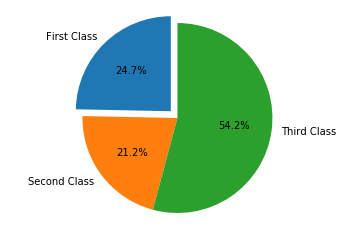

In [15]:
print("Percentage of first class")
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'First Class', 'Second Class', 'Third Class'
sizes = [class1,class2,class3]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Percentage: Gender


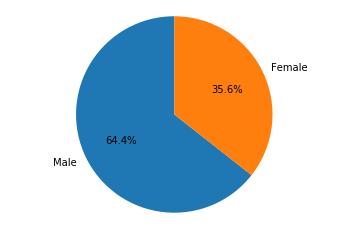

In [16]:
print("Percentage: Gender")
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'
sizes = [len(male_psgs),len(female_psgs)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

% Female Passenger Class


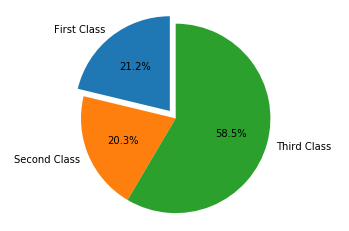

In [17]:
print("% Female Passenger Class")
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'First Class', 'Second Class', 'Third Class'
sizes = [
            len(df[(df['Sex']=='male') & (df['Pclass']==1)]),
            len(df[(df['Sex']=='male') & (df['Pclass']==2)]),
            len(df[(df['Sex']=='male') & (df['Pclass']==3)])
        ]

explode = (0.1, 0, 0)  # only "explode" the 2nd slice
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

% Female Passenger Class


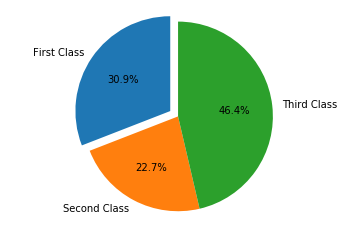

In [18]:
print("% Female Passenger Class")
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'First Class', 'Second Class', 'Third Class'
sizes = [
            len(df[(df['Sex']=='female') & (df['Pclass']==1)]),
            len(df[(df['Sex']=='female') & (df['Pclass']==2)]),
            len(df[(df['Sex']=='female') & (df['Pclass']==3)])
        ]

explode = (0.1, 0, 0)  # only "explode" the 2nd slice
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

******************************* 

# SUMMARY STATISTICS

*******************************

### Numerical Features

In [19]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


include findings : 
    - 
    - 

#### Summary Stats Manually

In [20]:
print("Mean Fare : {} \nMedian Fare : {} \nMax Fare : {} \nMin Fare : {} \n"
      .format(df.Fare.mean(),df.Fare.median(),df.Fare.max(),df.Fare.min()))

Mean Fare : 33.2954792813456 
Median Fare : 14.4542 
Max Fare : 512.3292 
Min Fare : 0.0 



Quantiles : 
    `

In [21]:
print("Fare 25 percentile : {}".format(df.Fare.quantile(.25)))
print("Fare 50 percentile : {}".format(df.Fare.quantile(.50)))
print("Fare 75 percentile : {}".format(df.Fare.quantile(.75)))

Fare 25 percentile : 7.8958
Fare 50 percentile : 14.4542
Fare 75 percentile : 31.275


Disperson:

In [22]:
print("Fare Range : {}".format(df.Fare.max() - df.Fare.min()))
print("Fare Variance : {}".format(df.Fare.var()))
print("Fare Standard Deviation : {}".format(df.Fare.std()))

Fare Range : 512.3292
Fare Variance : 2678.959737892894
Fare Standard Deviation : 51.75866823917414


Whisker & Box Plot

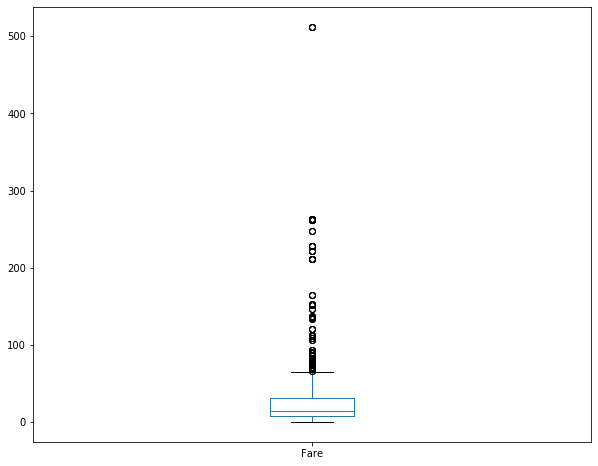

In [23]:
df.Fare.plot(kind='box' ,figsize = (10,8))
plt.show()

to include categorical variables stats use :

In [24]:
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


check diff and add findings below:
    - 
    - 
    - 

### Categorical Statistics

In [25]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [26]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

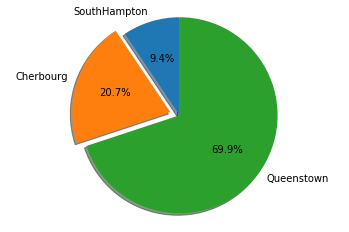

In [27]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'SouthHampton', 'Cherbourg', 'Queenstown'
sizes = [
            df.Embarked.value_counts()[0],
            df.Embarked.value_counts()[1],
            df.Embarked.value_counts()[2]
        ]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sorted(sizes), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [28]:
df[~(df.Survived == (-888))]['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [29]:
df[~(df.Survived == (-888))]['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [30]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

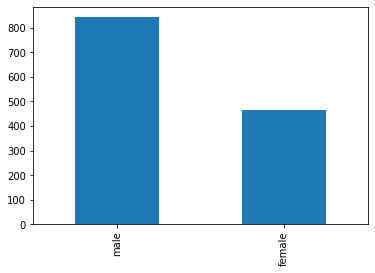

In [31]:
df.Sex.value_counts().plot(kind='bar')

In [32]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [33]:
df.Pclass.value_counts(normalize=True)

3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64

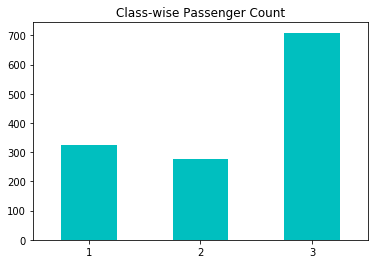

In [34]:
df.Pclass.value_counts().sort_index().plot(kind='bar',rot=0,title="Class-wise Passenger Count",color="c")

#### Distribution

- <u>Univariate:</u>
    - Distribution of One Feature : Use : 
        - Kernel Density Estimation(KDE) plot
        - Histogram
- <u>Bivariate:</u>
    - Distribution of Two Features : Use : 
        - Scatter-plots

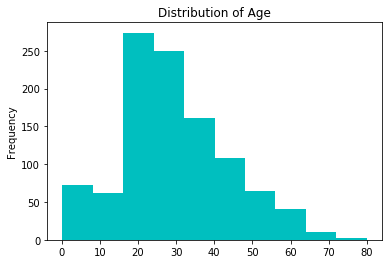

In [35]:
df.Age.plot(kind="hist",title= "Distribution of Age", color= "c")

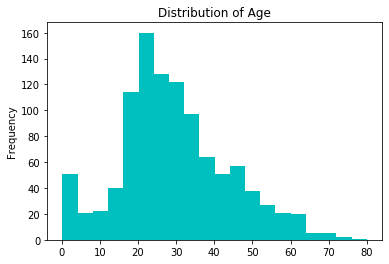

In [36]:
df.Age.plot(kind="hist",title= "Distribution of Age", color= "c", bins=20)

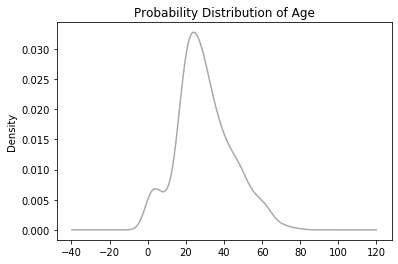

In [37]:
df.Age.plot(kind="kde",title= "Probability Distribution of Age", color= "darkgrey")

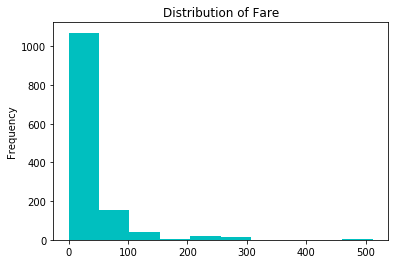

In [38]:
df.Fare.plot(kind="hist",title= "Distribution of Fare", color= "c")

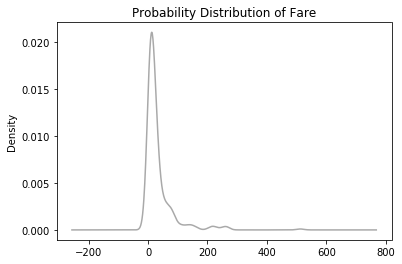

In [39]:
df.Fare.plot(kind="kde",title= "Probability Distribution of Fare", color= "darkgrey")

skewness = 0 : normally distributed.   
skewness > 0 : more weight in the left tail of the distribution.   
skewness < 0 : more weight in the right tail of the distribution.    

In [40]:
print("Skewness for Age\t: {} \nSkewness for Fare\t: {} ".format(df.Age.skew(),df.Fare.skew()))

Skewness for Age	: 0.40767455974362266 
Skewness for Fare	: 4.367709134122922 


***** 
<u>Bivariate</u>

- Scatterplot

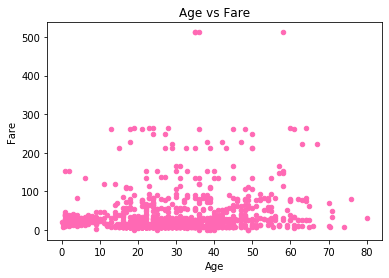

In [41]:
df.plot.scatter(x = 'Age', y = "Fare" ,color = "hotpink", title = "Age vs Fare" )

doesn't have any interesting patterns :
 - As age gets higher, there is not much significant change in fare

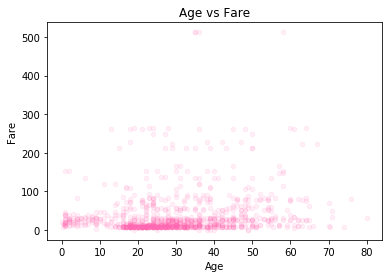

In [42]:
#since above diagram has lots of values cluttered & overlapped : use alpha
df.plot.scatter(x = 'Age', y = "Fare" ,color = "hotpink", title = "Age vs Fare" ,alpha = 0.1)

mostcrowded zone will get highlighted

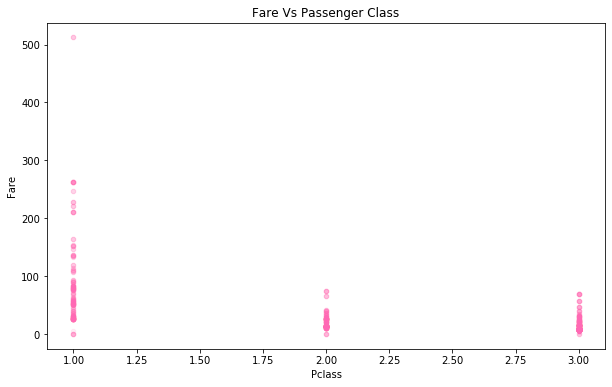

In [43]:
df.plot.scatter(x="Pclass",y="Fare" , title= "Fare Vs Passenger Class", color = "hotpink",alpha=0.1,figsize = (10,6) )

here, we can see that a lot of first class passengers paid fare below 100.   
They might have booked tickets earlier or they got some discount.   

## GROUPING

In [44]:
df.groupby('Sex')['Fare','Age'].mean()

,Fare,Age
Sex,,
female,46.198097,28.687088
male,26.154601,30.585228


In [45]:
df.groupby('Sex')['Fare','Age'].median()

,Fare,Age
Sex,,
female,23.0000,27.0
male,11.8875,28.0


In [46]:
df.groupby('Pclass')['Fare','Age'].mean()

,Fare,Age
Pclass,,
1,87.508992,39.159930
2,21.179196,29.506705
3,13.302889,24.816367


In [47]:
df.groupby('Pclass')['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


Here Median Makes Sense w.r.t the earlier scatter plot insight.

In [48]:
df.groupby(['Sex','Pclass'])['Sex'].count()

Sex     Pclass
female  1         144
        2         106
        3         216
male    1         179
        2         171
        3         493
Name: Sex, dtype: int64

From the above result:
    - Very high no. of male passengers were having 3rd class tickets
    - Same for female passengers , even though that is not as significant as it is for Male.
    - First class comprised of more people than 2nd class.

#### Aggregation

In [49]:
df.groupby('Sex')["Fare","Age"].agg({'Age':'median','Fare':'mean'})

,Age,Fare
Sex,,
female,27.0,46.198097
male,28.0,26.154601


In [50]:
# lets check complex aggregation functions
aggregations = {
    'Age' : {
        'Avg-age':'median',
        'highest-age': max,
        'lowest-age': min,
        'age-range' : lambda x : max(x) - min(x)
    }, 
    'Fare' : {
        'Avg-Fare':'mean',
        'Median-Fare' : 'median',
        'highest-Fare' : max,
        'lowest-Fare' : min,
        'Fare-range' : lambda x : max(x) - min(x)
    }
}

In [51]:
df.groupby('Pclass').agg(aggregations)

C:\Users\LOCALGHOST\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


Age                                        Fare              \
       Avg-age highest-age lowest-age age-range   Avg-Fare Median-Fare   
Pclass                                                                   
1         39.0        80.0       0.92     79.08  87.508992     60.0000   
2         29.0        70.0       0.67     69.33  21.179196     15.0458   
3         24.0        74.0       0.17     73.83  13.302889      8.0500   

                                            
       highest-Fare lowest-Fare Fare-range  
Pclass                                      
1          512.3292         0.0   512.3292  
2           73.5000         0.0    73.5000  
3           69.5500         0.0    69.5500

In [52]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [53]:
df.groupby(['Pclass','Embarked']).Fare.count()

Pclass  Embarked
1       C           141
        Q             3
        S           177
2       C            28
        Q             7
        S           242
3       C           101
        Q           113
        S           494
Name: Fare, dtype: int64

In [54]:
df.groupby(['Pclass','Embarked']).Fare.mean()

Pclass  Embarked
1       C           106.845330
        Q            90.000000
        S            72.148094
2       C            23.300593
        Q            11.735114
        S            21.206921
3       C            11.021624
        Q            10.390820
        S            14.435422
Name: Fare, dtype: float64

#### Crosstabs

In [55]:
pd.crosstab(df.Sex,df.Pclass) #unlike groupby , it takes count

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


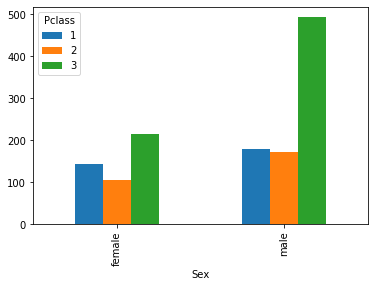

In [56]:
pd.crosstab(df.Sex,df.Pclass).plot(kind = 'bar')

#### PIVOT TABLE

In [57]:
df.pivot_table(index = 'Sex' ,columns = 'Pclass',values = 'Age',aggfunc = "mean")

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


same can be achieved using groupby as follows :

In [58]:
df.groupby(['Pclass','Sex']).Age.mean()

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

In [59]:
df.groupby(['Pclass','Sex']).Age.mean().unstack()

Sex,female,male
Pclass,,
1,37.037594,41.029272
2,27.499223,30.815380
3,22.185329,25.962264


from above , it is evident that male passengers were older than female passengers

groupby & pivot table are handy when we want to analyze numerical features w.r.to different combinations of categorical features.

### DATA MUNGING : HANDLING MISSING VALUES

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


Techniques for handling missing values
    - Deletion (use if we only have a few missing values)
    - Imputation
            - mean
            - median 
            - mode

From the above info , we have missing values in Age,Cabin,Embarked & Fare

First, lets check how many values are there in each column

In [61]:
df.isna().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
dtype: int64

now impute missing values . 
For that,check the rows which has missing values

In [62]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


#### Now lets check different options to fill the value

In [63]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [64]:
print("{} % of passengers Embarked at South Hampton".format(round((914/(914+270+123))*100,2)))

69.93 % of passengers Embarked at South Hampton


now the two people that has missing values survived. so lets check, from where we have most no. of survivors

In [65]:
#filter values before crosstab : we merged train & test(doesnot have survived column) above and filled missing with -888
pd.crosstab(df[df.Survived != -888].Survived,df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [66]:
print("{} % of passengers Embarked at Cherbourg survived".format(round((93/(93+75))*100,2)))
print("{} % of passengers Embarked at Queenstown survived".format(round((30/(47+30))*100,2)))
print("{} % of passengers Embarked at South Hampton survived".format(round((217/(427+217))*100,2)))

55.36 % of passengers Embarked at Cherbourg survived
38.96 % of passengers Embarked at Queenstown survived
33.7 % of passengers Embarked at South Hampton survived


Check the embarkment point count for Male and Female

Now to be specific both the Passengers were female as well as first class. Lets check that too.. Lets findout which embarkment point has most no. of female survivors with first class ticket.

In [67]:
df[df.Survived != -888].groupby(['Pclass','Embarked','Sex']).Survived.sum().unstack()

Sex              female  male
Pclass Embarked              
1      C             42    17
       Q              1     0
       S             46    28
2      C              7     2
       Q              2     0
       S             61    15
3      C             15    10
       Q             24     3
       S             33    34

So both Cherbourg & SouthHampton has very high no of female survivors

lets compare the ticket price of both passengers with avg first class ticket price 

In [68]:
df[(df.Pclass == 1) & (df.Sex=='female') ].groupby('Embarked')['Survived'].count()

Embarked
C    71
Q     2
S    69
Name: Survived, dtype: int64

In [69]:
df[(df.Pclass == 1) & (df.Sex=='female') & (df.Survived == 1)].groupby('Embarked')['Survived'].count()

Embarked
C    42
Q     1
S    46
Name: Survived, dtype: int64

In [70]:
df[(df.Pclass == 1) & (df.Sex=='female') & (df.Survived == 1)].groupby('Embarked')['Fare'].median()

Embarked
C    83.1583
Q    90.0000
S    79.2500
Name: Fare, dtype: float64

In [71]:
df[(df.Pclass == 1)].groupby('Embarked')['Fare'].median()

Embarked
C    76.7292
Q    90.0000
S    52.0000
Name: Fare, dtype: float64

In [72]:
df[df['Sex']=='female'].groupby('Embarked')['Fare'].median()

Embarked
C    57.75
Q     7.75
S    23.00
Name: Fare, dtype: float64

now lets aggregate all the facts to arrive at a conclusion
    -  
    - add facts here

Considering all the data , Cherbourg makes a sensible choice for filling in the values

To fill missing values,

In [73]:
# df[df.Embarked.isnull]['Embarked']=='C'

or

In [74]:
df.Embarked.fillna('C',inplace=True)

Now lets handle Fare Attribute

In [75]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [76]:
median_fare = df[(df.Embarked=="S") & (df.Pclass == 1)].Fare.median()

In [77]:
df['Fare'].fillna(median_fare,inplace= True) #replace na with median fare

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


Age attribute

In [79]:
df.Age.isnull().sum() #263 missing values

263

In [80]:
df.Age.isna().sum() #we can use both methods

263

In [81]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,3,female,0,-888,334915
1302,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,3,female,0,-888,365237
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236


In [82]:
# to sex max rows to be displayed
pd.options.display.max_rows = 15

In [83]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,3,female,0,-888,334915
1302,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,3,female,0,-888,365237
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236


Explore ways to fill missing age values:
        - I : mean age

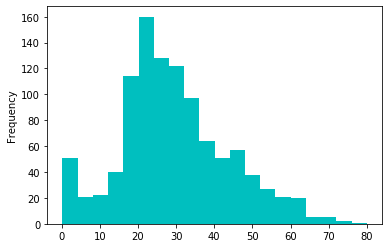

In [84]:
df.Age.plot(kind ="hist" , bins = 20, color = 'c')

In [85]:
round(df.Age.mean())

30

Isuue : From the histogram , we can see that the age values have a high concentration in 20-35 range. But we can also see that the few 70-80 values are pushing the mean age. In this case we can actually make use of median

In [86]:
round(df.Age.median())

28

In [ ]:
# Here you can fill missing values with mean or median. to do so , uncomment & execute the following line.

# df[df.Age.isnull()]['Age'].fillna(round(df.Age.median()),inplace=True)

Lets check for other possibilities

In [91]:
# df.groupby('Sex').Age.transform('median')

In [92]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

almost same for both gender

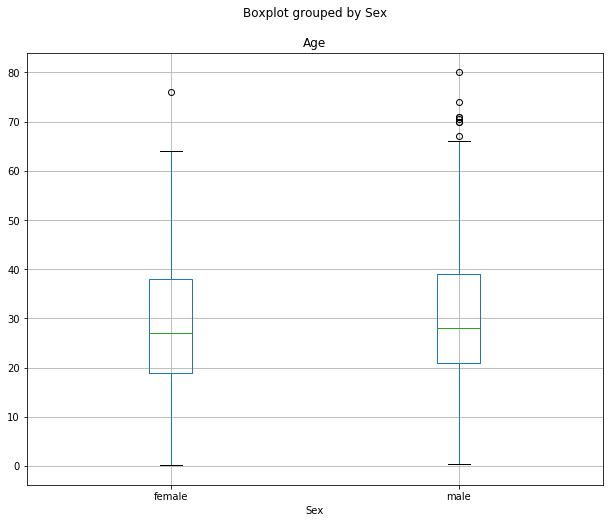

In [94]:
df[df.Age.notnull()].boxplot('Age','Sex',figsize = (10,8))

distribution is almost similar for both Gender 

lets check one more option and decide which one to use for filling values

In [95]:
df.groupby('Pclass').Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

this one seems like a better option to fill the missing values

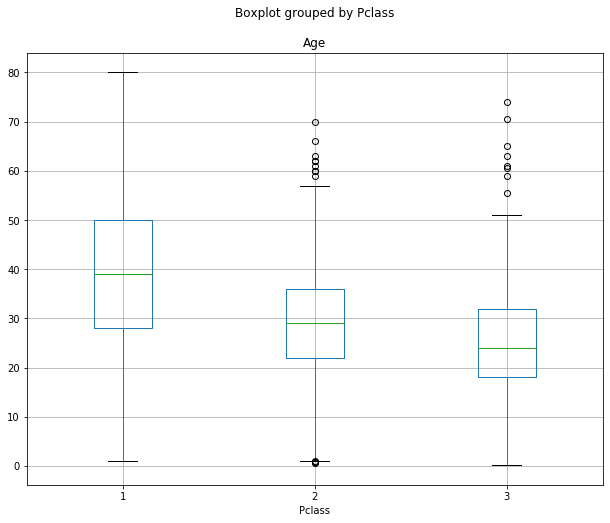

In [96]:
df[df.Age.notnull()].boxplot('Age','Pclass', figsize=(10,8))

makes sense !!!!!!!!!!!!!

In [97]:
# to fill values using the plcass median, use : transform function

# age_median_pclass = df.groupby('Pclass').Age.transform('median')
# df.Age.fillna(age_median_pclass,inplace=True)

now we can explore a much better way to fill values

In [98]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

checkout the title before a person's name

In [102]:
# function to extract a title from Name column
def GetTitle(Name):
    name_with_title = Name.split(',')[1]
    title = name_with_title.split('.')[0]
    title_formatted = title.strip(' ').lower()
    return title_formatted

In [103]:
# maps Gettitle function to all rows of Name column
df.Name.map(GetTitle)  # alternatively we can use df.Name.map(lambda x:GetTitle(x))

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
         ...  
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [117]:
print(df.Name.map(GetTitle).unique())

['mr' 'mrs' 'miss' 'master' 'don' 'rev' 'dr' 'mme' 'ms' 'major' 'lady'
 'sir' 'mlle' 'col' 'capt' 'the countess' 'jonkheer' 'dona']


We got a long list of titles, which can be use to correctly identify age group of a person with missing age value.   
Also we need to reduce the list size. For this we can redefine the above function : GetTitle. 

In [127]:
def GetTitle(Name):
    
#     add a dictionary to reduce title categories 
    
    title_dict = {
        'mr' : 'Mr' ,
        'mrs' : 'Mrs' ,
        'miss' : 'Miss' ,
        'master' : 'Master' ,
        'don' : 'Sir' ,
        'rev' : 'Sir' ,
        'dr' : 'Officer' ,
        'mme' : 'Mrs' ,
        'ms' : 'Mrs' ,
        'major' : 'Officer' ,
        'lady' : 'Lady' ,
        'sir' : 'Sir' ,
        'mlle' : 'Miss' ,
        'col' : 'Officer' ,
        'capt' : 'Officer' ,
        'the countess' : 'Lady' ,
        'jonkheer' : 'Sir' ,
        'dona' : 'Lady' ,
    }
    
    name_with_title = Name.split(',')[1]
    title = name_with_title.split('.')[0]
    title_formatted = title.strip(' ').lower()
    return title_dict[title_formatted]

In [122]:
df['Title'] = df.Name.map(GetTitle) #create new column and assign values with output GetTitle function  

In [123]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


Title added . Now lets check the distribution of age across diff titles

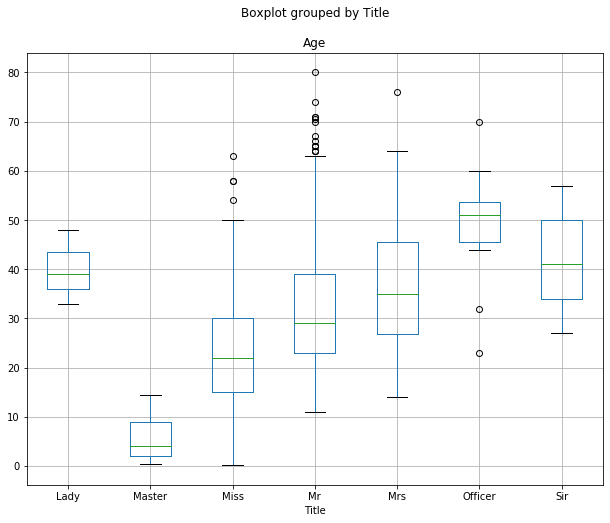

In [128]:
df[df.Age.notnull()].boxplot('Age','Title',figsize=(10,8))

This gives us a more meaningful  way to fill missing values and this is an example for mining hidden patterns in data

In [129]:
 df.groupby('Title')['Age'].median()

Title
Lady       39.0
Master      4.0
Miss       22.0
Mr         29.0
Mrs        35.0
Officer    51.0
Sir        41.0
Name: Age, dtype: float64

In [131]:
# fill missing rows with above median values

title_median_age = df.groupby('Title')['Age'].transform('median')
df.Age.fillna(title_median_age,inplace= True)

In [133]:
df.info() # check if all values have been filled

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


### OUTLIERS

Issue : 
    - Biased Analysis
    - Biased Models

Some of the most popular methods for outlier detection techniques are:
    - For Numeric Outliers : Simplest Way
        - Boxplot [1.5 above interquartile range is considered outlier]
        - Histogram
        - Scatterplot
    - DBSCAN
    - Z-Score or Extreme Value Analysis (parametric)
    - Probabilistic and Statistical Modeling (parametric)
    - Linear Regression Models (PCA, LMS)
    - Proximity Based Models (non-parametric) etc.

Solution : 
    - Removal (not efficient since it is possible to lose sight of some important information)
    - Transformation ( transform to different scale : log or sqrt)
    - Binning ( put values into different bins , keep extreme values in one bin)
    - Imputation (replace extreme values with plausible values)

#### Working with outliers

##### Age

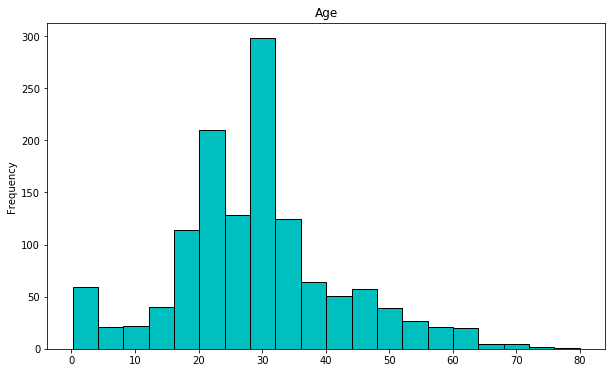

In [147]:
df.Age.plot(kind= "hist", bins= 20, figsize =(10,6) ,edgecolor = 'black', linewidth =1.0, color = 'c', title = "Age")

From histogram, it is evident that we have some extreme values in 70-80 range. Explore those values

In [153]:
display(df[df.Age > 70], "No of rows: %i" %df[df.Age > 70].shape[0])

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,Mrs


'No of rows: 6'

##### Fare

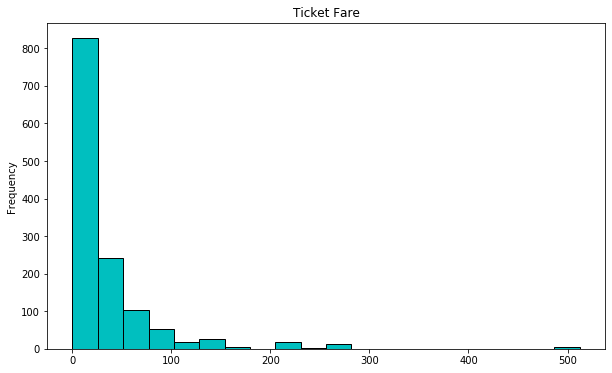

In [155]:
df.Fare.plot(kind = "hist",bins = 20,title = "Ticket Fare", color = "c", edgecolor = 'black', linewidth = 1, figsize = (10,6))

Highly skewed to the left and extreme values are the in the last bin

lets understand bit more using a boxplot

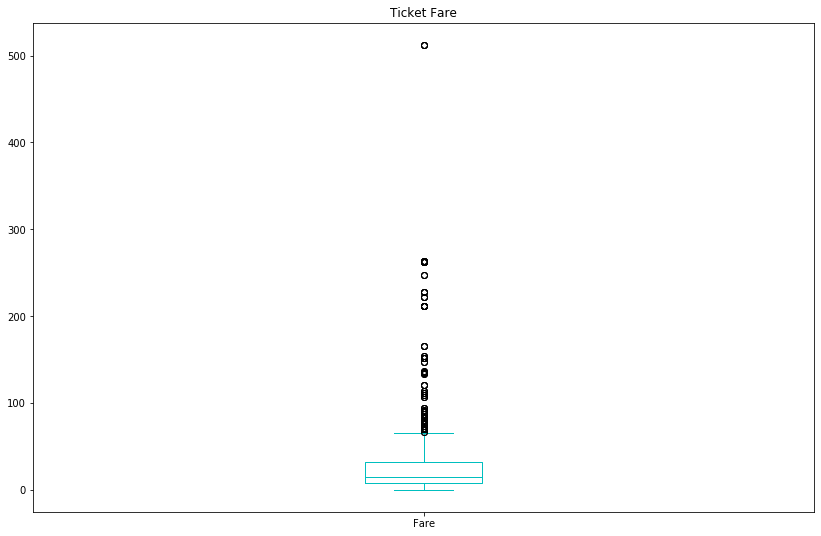

In [161]:
df.Fare.plot(kind= "box", figsize = (14,9), title = "Ticket Fare", color = 'c')

note that we have extreme value at 500 , lets investigate why we have such a value.

In [162]:
df.loc[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs


All four row has same ticket number, meaning they were travelling together(could be a family).

might have booked ticket at the last moment and could be the reason they had to pay a very high amount

From the title and name : Mrs Drake and Mr Drake implies married couple. they were together and they survived !! ? :-0

Worth Exploring -- But What can we do about these values ? 
Should we remove it ? 

In [163]:
#Try some transformations to reduce the skewness

LogFare = np.log(df.Fare + 1.0) 

adding 1 to accomodate zero fares : some passengers have fare zero and log(0) is not defined

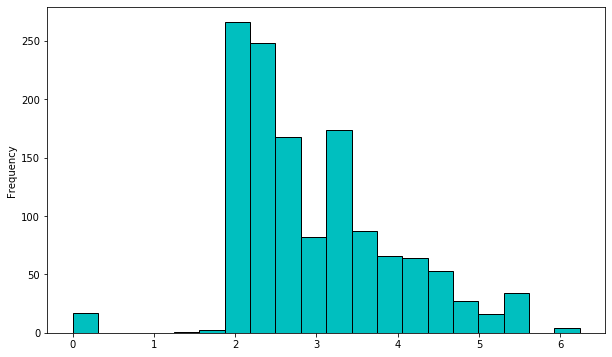

In [164]:
# Histogram  of logfare

LogFare.plot(kind = "hist",bins = 20, figsize = (10,6), color = "c",edgecolor = "black", linewidth = 1)

less skewed now

##### Binning

Binning is also an efficient way for handling outliers. For binning we can use cut or qcut function. qcut does quantile based binning.

In [165]:
pd.qcut(df.Fare, 4) #four bins

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
              ...        
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

check the the range of diff bins in the above output

In [167]:
pd.qcut(df.Fare, 4, labels = ['very low','low','high','very high']) #discretization

PassengerId
1        very low
2       very high
3             low
4       very high
5             low
          ...    
1305          low
1306    very high
1307     very low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very low < low < high < very high]

discretization : numerical feature to categorical feature

discrete categories out of continuous numerical features

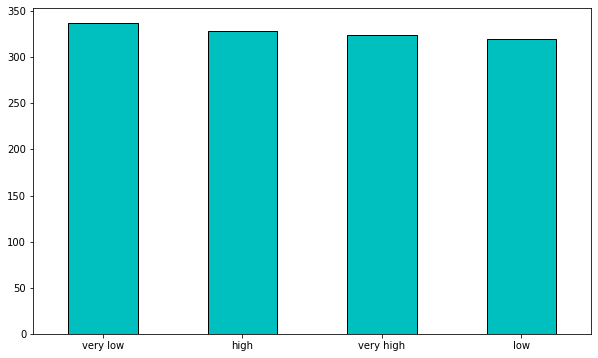

In [170]:
pd.qcut(df.Fare, 4, labels = ['very low','low','high','very high']).value_counts().plot(
    kind= "bar", figsize = (10,6), color = "c",edgecolor = "black", linewidth = 1 , rot = 0)

In [171]:
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels = ['very low','low','high','very high'])

In [172]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr,very low
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs,very high
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss,low
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs,very high
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr,low


# Feature Engineering

- Transformation
- Selection
- Creation (Create new features from existing features)

Uses Domain Knowledge and Technical Expertise to comeup with innovative features